In [1]:
import numpy
import math
import matplotlib.pyplot as plt
import scipy.special

Maclaurin series for $\tan(x)$ is:
\begin{align}
\tan(x)
&= \sum_{k=1}^{\infty} \frac{ (-1)^{k-1} 2^{2k} ( 2^{2k} -1 ) B_{2k} }{ (2k)! } x^{2k-1} \\
&= x + \frac{1}{3} x^3 + \frac{1}{15} x^5 + \frac{17}{315} x^7 + \frac{62}{2835} x^9 + \ldots
\end{align}
The roundoff error is associated with the addition/subtraction involving the largest term which (for $|x|<6$) will be the first term, so of order $|x|\epsilon$.

In [2]:
# Bernoulli numbers
def bernoulli_numerator(n):
    N = [1.,1.,1.,0,-1.,0,1.,0,-1.,0,5.,0,-691.,0,7.,0,-3617.,0,43867.,0,-174611.]
    return N[n]
def bernoulli_denominator(n):
    D = [1,2,6,0,30,0,42,0,30,0,66,0,2730,0,6,0,510,0,798,0,330]
    return D[n]
def bernoulli(n):
    B = [1,-.5,1./6,0,-1./30,0,1./42,0,-1./30,0,5./66,0,-691./2730,0,7./6,0,-3617./510,0,43867./798,0,-174611./330]
    return bernoulli_numerator(n) / bernoulli_denominator(n)
    return B[n]
def tan_numerator(n):
    # http://oeis.org/A002430
    N = [1, 1, 2, 17, 62, 1382, 21844, 929569, 6404582, 443861162, 18888466084, 113927491862, 58870668456604, 8374643517010684, 689005380505609448, 129848163681107301953, 1736640792209901647222, 418781231495293038913922]
    return N[n]
def tan_denominator(n):
    # http://oeis.org/A036279
    D = [1, 3, 15, 315, 2835, 155925, 6081075, 638512875, 10854718875, 1856156927625, 194896477400625, 2900518163668125, 3698160658676859375, 1298054391195577640625, 263505041412702261046875, 122529844256906551386796875, 4043484860477916195764296875]
    return D[n]
print('%2s'%'k', '%23s'%'B[k]', '%25s'%'2**2k * (2**2k - 1)', '%48s'%'(2k)!')
for k in range(1,11):
    print( '%2i'%k, '%23.16e'%(bernoulli(2*k)), '%25i'%( 2**(2*k) * ( 2**(2*k) - 1 ) ), '%48i'%(math.factorial(2*k)) )
F,C = [0.]*(18), [0.]*(18)
for k in range(1,18):
    F[k] = 2**(2*k) * ( 2**(2*k) - 1 ) / math.factorial(2*k) 
    #C[k] = F[k] * abs(bernoulli(2*k))
    C[k] = tan_numerator(k-1)/tan_denominator(k-1)
    #C[k] = ( 2**(2*k) * ( 2**(2*k) - 1 ) * bernoulli_numerator(2*k) ) / ( math.factorial(2*k) * bernoulli_denominator(2*k) )
    print( '%2i'%k, '%23.16e'%F[k], '%23.16e'%C[k], '%23.16e'%(tan_numerator(k-1)/tan_denominator(k-1)) )
print(1/3,2/15,17/315,62/2835)

 k                    B[k]       2**2k * (2**2k - 1)                                            (2k)!
 1  1.6666666666666666e-01                        12                                                2
 2 -3.3333333333333333e-02                       240                                               24
 3  2.3809523809523808e-02                      4032                                              720
 4 -3.3333333333333333e-02                     65280                                            40320
 5  7.5757575757575760e-02                   1047552                                          3628800
 6 -2.5311355311355310e-01                  16773120                                        479001600
 7  1.1666666666666667e+00                 268419072                                      87178291200
 8 -7.0921568627450977e+00                4294901760                                   20922789888000
 9  5.4971177944862156e+01               68719214592                              

epsilon = 2.22e-16 = 2**-52
22.5


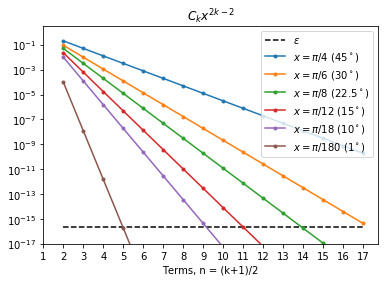

In [3]:
# Significance of each term to leading term
k, eps = numpy.arange(2,18), numpy.finfo(float).eps
print('epsilon = %.2e'%eps, "= 2**%i"%int(math.log(eps)/math.log(2)))
plt.semilogy(k, eps * (1+0*k), 'k--', label=r'$\epsilon$' )
plt.semilogy(k, (numpy.pi/4)**(2*k-2) * numpy.array(C)[k], '.-', label=r'$x=\pi/4$ (45$^\circ$)' );
plt.semilogy(k, (numpy.pi/6)**(2*k-2) * numpy.array(C)[k], '.-', label=r'$x=\pi/6$ (30$^\circ$)' );
plt.semilogy(k, (numpy.pi/8)**(2*k-2) * numpy.array(C)[k], '.-', label=r'$x=\pi/8$ (22.5$^\circ$)' );
plt.semilogy(k, (numpy.pi/12)**(2*k-2) * numpy.array(C)[k], '.-', label=r'$x=\pi/12$ (15$^\circ$)' );
plt.semilogy(k, (numpy.pi/18)**(2*k-2) * numpy.array(C)[k], '.-', label=r'$x=\pi/18$ (10$^\circ$)' );
plt.semilogy(k, (numpy.pi/180)**(2*k-2) * numpy.array(C)[k], '.-', label=r'$x=\pi/180$ (1$^\circ$)' );
plt.gca().set_xticks(numpy.arange(1,18)); plt.legend(); plt.xlabel('Terms, n = (k+1)/2'); plt.ylim(1e-17,3);
plt.title(r'$C_kx^{2k-2}$');
print(180/8)

In [4]:
def tan_by_series(x):
    # http://oeis.org/A002430
    N = [1, 1, 2, 17, 62, 1382, 21844, 929569, 6404582, 443861162, 18888466084, 113927491862, 58870668456604, 8374643517010684, 689005380505609448, 129848163681107301953, 1736640792209901647222]
    # http://oeis.org/A036279
    D = [1, 3, 15, 315, 2835, 155925, 6081075, 638512875, 10854718875, 1856156927625, 194896477400625, 2900518163668125, 3698160658676859375, 1298054391195577640625, 263505041412702261046875, 122529844256906551386796875, 4043484860477916195764296875]
    C = numpy.array(N) / numpy.array(D)
    n, x2, xx, r = len(C), x*x, 1., 0.
    term = [1.] * (n)
    for k in range(1,n):
        xx = xx * x2
        term[k] = xx * C[k]
    for j in range(k,-1,-1):
        r = r + term[j]
    return r * x 
angle = numpy.array([numpy.pi/80, numpy.pi/8])
print( tan_by_series( angle ), numpy.tan( angle ) )

[0.03929011 0.41421356] [0.03929011 0.41421356]


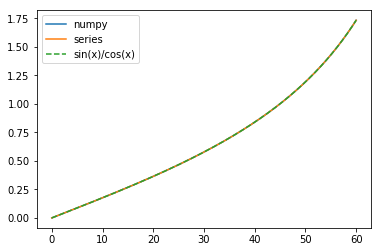

In [5]:
x = numpy.linspace(0, numpy.pi/3,1000)
plt.plot( x*180/numpy.pi, numpy.tan(x), label='numpy');
plt.plot( x*180/numpy.pi, tan_by_series(x), label='series');
plt.plot( x*180/numpy.pi, numpy.sin(x)/numpy.cos(x), '--', label='sin(x)/cos(x)');
plt.legend()

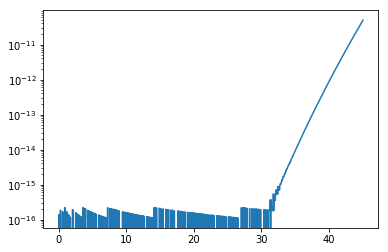

In [8]:
x = numpy.linspace(numpy.finfo(1.).eps, numpy.pi/4,1000)
plt.semilogy( x*180/numpy.pi, numpy.abs( tan_by_series(x) - numpy.tan(x) ) / numpy.tan(x));